In [17]:
import numpy as np
from scipy.stats import norm

# Fonction pour simuler un processus de branchement général
def branching_process(population_size, reproduction_function, max_generations):
    population = [population_size]  # Population initiale avec un seul individu
    generations = 1

    while generations <= max_generations:
        new_generation = 0
        for _ in range(population[-1]):
            offspring = reproduction_function()
            new_generation += offspring
        population.append(new_generation)
        generations += 1

    return population

# Simulation d'un processus de branchement général avec une fonction de reproduction arbitraire
population_size = 1

def reproduction_function():
    # Exemple de fonction de reproduction produisant un nombre aléatoire d'individus
    return np.random.poisson(3)

max_generations = 10

population = branching_process(population_size, reproduction_function, max_generations)
print("Population:", population)

# Fonction pour évaluer une option barrière
def evaluate_barrier_option(spot_price, barrier_price, risk_free_rate, volatility, time_to_maturity, option_type):
    # Calcul des paramètres de l'option
    d1 = (np.log(spot_price / barrier_price) + (risk_free_rate + 0.5 * volatility**2) * time_to_maturity) / (volatility * np.sqrt(time_to_maturity))
    d2 = d1 - volatility * np.sqrt(time_to_maturity)
    
    # Calcul du prix de l'option en fonction du type (call ou put)
    if option_type == 'call':
        option_price = spot_price * norm.cdf(d1) - barrier_price * np.exp(-risk_free_rate * time_to_maturity) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = barrier_price * np.exp(-risk_free_rate * time_to_maturity) * norm.cdf(-d2) - spot_price * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type")
    
    return option_price

# Exemple d'évaluation d'une option barrière avec un processus de branchement général
spot_price = 100
barrier_price = 120
risk_free_rate = 0.05
volatility = 0.2
time_to_maturity = 1
option_type = 'call'

option_price = evaluate_barrier_option(spot_price, barrier_price, risk_free_rate, volatility, time_to_maturity, option_type)
print("Prix de l'option barrière:", option_price)


Population: [1, 4, 7, 23, 66, 193, 598, 1829, 5532, 16401, 48704]
Prix de l'option barrière: 3.2474774165608125


In [3]:
import numpy as np
from scipy.stats import norm

# Fonction pour simuler le processus de Galton-Watson
def galton_watson_process(population_size, reproduction_distribution, max_generations):
    population = [population_size]  # Population initiale avec un seul individu
    generations = 1

    while generations <= max_generations:
        new_generation = 0
        for _ in range(population[-1]):
            offspring = np.random.choice(reproduction_distribution)
            new_generation += offspring
        population.append(new_generation)
        generations += 1

    return population

# Simulation du processus de Galton-Watson avec une loi de reproduction suivant une distribution binomiale
population_size = 1
reproduction_distribution = np.random.binomial(10, 0.5, size=100)  # Exemple de distribution binomiale
#géométrique de l'article
#component wise
max_generations = 10
#possible sur d'autres fonctions de reproduction que binomiale, à voir la pertinence
population = galton_watson_process(population_size, reproduction_distribution, max_generations)
print("Population:", population)



Population: [1, 5, 25, 113, 559, 2753, 13578, 67127, 332322, 1641675, 8110144]


In [8]:
# Fonction pour évaluer une option barrière
import numpy as np
from scipy.stats import norm

def evaluate_barrier_option(spot_price, barrier_price, risk_free_rate, volatility, time_to_maturity, option_type):
    # Calcul des paramètres de l'option, Black Scholes equations
    d1 = (np.log(spot_price / barrier_price) + (risk_free_rate + 0.5 * volatility**2) * time_to_maturity) / (volatility * np.sqrt(time_to_maturity))
    d2 = d1 - volatility * np.sqrt(time_to_maturity)
    
    # Calcul du prix de l'option en fonction du type (call ou put)
    if option_type == 'call':
        option_price = spot_price * norm.cdf(d1) - barrier_price * np.exp(-risk_free_rate * time_to_maturity) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = barrier_price * np.exp(-risk_free_rate * time_to_maturity) * norm.cdf(-d2) - spot_price * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type")
    
    return option_price

# Exemple d'évaluation d'une option barrière
spot_price = 100
barrier_price = 120
risk_free_rate=0.5
volatility = 0.1
time_to_maturity = 5
option_type='call'
print("pricing d'option barrière", evaluate_barrier_option(spot_price, barrier_price, risk_free_rate, volatility, time_to_maturity,option_type))

pricing d'option barrière 90.14980016513215


In [14]:
# Fonction pour évaluer une option barrière avec le processus de Galton-Watson
def evaluate_barrier_option_gw(spot_price, barrier_price, risk_free_rate, volatility, time_to_maturity, option_type, gw_population_size, gw_reproduction_distribution, gw_max_generations, num_simulations):
    option_prices = []

    for _ in range(num_simulations):
        population = galton_watson_process(gw_population_size, gw_reproduction_distribution, gw_max_generations)

        # Générer les trajectoires du sous-jacent en utilisant les populations simulées
        prices = [spot_price]
        for i in range(1, gw_max_generations + 1):
            drift = risk_free_rate * i
            diffusion = volatility * np.sqrt(i) * np.random.normal(0, 1)
            price = prices[i-1] + drift * prices[i-1] + diffusion * prices[i-1]
            prices.append(price)

        # Vérifier si la barrière a été franchie
        barrier_crossed = False
        for price in prices:
            if price <= barrier_price:
                barrier_crossed = True
                break

        # Calcul du prix de l'option en fonction du type (call ou put)
        if option_type == 'call':
            if barrier_crossed:
                option_price = 0
            else:
                option_price = np.maximum(prices[-1] - spot_price, 0)
        elif option_type == 'put':
            if barrier_crossed:
                option_price = np.maximum(barrier_price - prices[-1], 0)
            else:
                option_price = 0
        else:
            raise ValueError("Invalid option type")

        option_prices.append(option_price)

    option_price_mean = np.mean(option_prices)
    option_price_std = np.std(option_prices)

    return option_price_mean, option_price_std

# Paramètres du processus de Galton-Watson
population_size_gw = 1
reproduction_distribution_gw = np.random.binomial(10, 0.5, size=100)  # Exemple de distribution binomiale
max_generations_gw = 10

# Paramètres de l'option barrière
spot_price = 100
barrier_price = 120
risk_free_rate = 0.5
volatility = 0.2
time_to_maturity = 5
option_type='call'

num_simulations = 1000
print("pricing barrier", evaluate_barrier_option_gw(spot_price, barrier_price, risk_free_rate, volatility, time_to_maturity, option_type, gw_population_size, gw_reproduction_distribution, gw_max_generations, num_simulations))

pricing barrier (0.0, 0.0)


In [16]:
import numpy as np

def barrier_option_branching_process(spot_price, strike_price, barrier_price, risk_free_rate, volatility, time_to_maturity, num_simulations, num_steps):
    dt = time_to_maturity / num_steps
    discount_factor = np.exp(-risk_free_rate * time_to_maturity)

    option_prices = []

    for _ in range(num_simulations):
        prices = [spot_price]
        barrier_crossed = False

        for _ in range(num_steps):
            drift = (risk_free_rate - 0.5 * volatility**2) * dt
            diffusion = volatility * np.sqrt(dt) * np.random.normal(0, 1)
            price = prices[-1] + drift * prices[-1] + diffusion * prices[-1]
            prices.append(price)

            if price <= barrier_price:
                barrier_crossed = True
                break

        if not barrier_crossed:
            payoff = np.maximum(prices[-1] - strike_price, 0)
            option_prices.append(payoff)

    option_price = np.mean(option_prices) * discount_factor

    return option_price

spot_price = 100
strike_price = 105
barrier_price = 120
risk_free_rate = 0.05
volatility = 0.2
time_to_maturity = 1
num_simulations = 10000
num_steps = 100

option_price = barrier_option_branching_process(spot_price, strike_price, barrier_price, risk_free_rate, volatility, time_to_maturity, num_simulations, num_steps)

print("Prix de l'option barrière:", option_price)


Prix de l'option barrière: nan


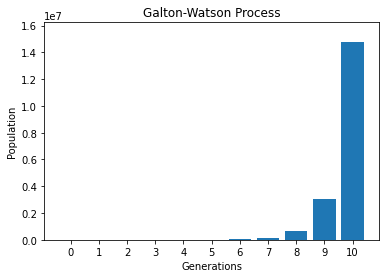

In [5]:
import numpy as np
from matplotlib import pyplot as plt
def visualize_galton_watson(process):
    generations = len(process)
    max_population = max(process)

    plt.bar(range(generations), process)
    plt.xlabel("Generations")
    plt.ylabel("Population")
    plt.title("Galton-Watson Process")
    plt.xticks(range(generations))
    plt.ylim(0, max_population * 1.1)
    plt.show()
    
# Simulation du processus de Galton-Watson avec une loi de reproduction suivant une distribution binomiale
population_size = 1
reproduction_distribution = np.random.binomial(10, 0.5, size=100)  # Exemple de distribution binomiale
max_generations = 10
#possible sur d'autres fonctions de reproduction que binomiale, à voir la pertinence
process = galton_watson_process(population_size, reproduction_distribution, max_generations)
# Visualize the process
visualize_galton_watson(process)